## Background

## 1. Import modules 

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [48]:
from wordcloud import WordCloud, STOPWORDS 
import random
import time
import re 
import string
import nltk

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
pd.options.mode.chained_assignment = None  # default value='warn'

In [8]:
df = pd.read_csv('complaints.csv', low_memory = False)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date received,6/13/2019,11/1/2019,4/1/2019,8/26/2019,2/22/2021,8/8/2019,7/8/2019,6/10/2020,2/14/2019,7/3/2019
Product,"Credit reporting, credit repair services, or o...",Vehicle loan or lease,"Credit reporting, credit repair services, or o...",Checking or savings account,Credit card or prepaid card,Mortgage,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit card or prepaid card,"Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,Loan,Credit reporting,Checking account,General-purpose credit card or charge card,Conventional home mortgage,Credit reporting,Credit reporting,General-purpose prepaid card,Credit reporting
Issue,Incorrect information on your report,Struggling to pay your loan,Incorrect information on your report,Managing an account,Problem when making payments,Trouble during payment process,Problem with a credit reporting company's inve...,Improper use of your report,Trouble using the card,Incorrect information on your report
Sub-issue,Information belongs to someone else,Denied request to lower payments,Account status incorrect,Deposits and withdrawals,Problem during payment process,NaN,Their investigation did not fix an error on yo...,Credit inquiries on your report that you don't...,Problem with direct deposit,Account information incorrect
Consumer complaint narrative,NaN,I contacted Ally on Friday XX/XX/XXXX after fa...,NaN,NaN,On XX/XX/2019 my bill did not go through accou...,NaN,Hello This complaint is against the three cred...,I am a victim of Identity Theft & currently ha...,NaN,Two accounts are still on my credit history af...
Company public response,NaN,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,NaN,Company has responded to the consumer and the ...
Company,CAPITAL ONE FINANCIAL CORPORATION,ALLY FINANCIAL INC.,"TRANSUNION INTERMEDIATE HOLDINGS, INC.","BANK OF AMERICA, NATIONAL ASSOCIATION","BANK OF AMERICA, NATIONAL ASSOCIATION","FLAGSTAR BANK, FSB","TRANSUNION INTERMEDIATE HOLDINGS, INC.",Experian Information Solutions Inc.,Comerica,Experian Information Solutions Inc.
State,PA,NJ,PA,FL,FL,ID,NY,MT,CA,FL
ZIP code,18640,8854,19067,33194,32541,83706,10940,59538,95213,32839


In [6]:
df.shape

(1048575, 18)

In [23]:
df.info

<bound method DataFrame.info of         Date received                                            Product  \
0           6/13/2019  Credit reporting, credit repair services, or o...   
1           11/1/2019                              Vehicle loan or lease   
2            4/1/2019  Credit reporting, credit repair services, or o...   
3           8/26/2019                        Checking or savings account   
4           2/22/2021                        Credit card or prepaid card   
...               ...                                                ...   
1048570     2/27/2020                              Vehicle loan or lease   
1048571      3/2/2020  Credit reporting, credit repair services, or o...   
1048572      5/1/2018  Credit reporting, credit repair services, or o...   
1048573     4/18/2020  Credit reporting, credit repair services, or o...   
1048574    11/12/2020  Credit reporting, credit repair services, or o...   

                                        Sub-product  \


In [7]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [9]:
# Size of Chase 
df.isin(['JPMORGAN CHASE & CO.']).sum(axis=0)

Date received                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                           0
Consumer complaint narrative        0
Company public response             0
Company                         25622
State                               0
ZIP code                            0
Tags                                0
Consumer consent provided?          0
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?                  0
Complaint ID                        0
dtype: int64

In [10]:
df1 = df.filter(['Date received', 'Product', 'Consumer complaint narrative','Company'])

In [12]:
df1.head()

,Date received,Product,Consumer complaint narrative,Company
0,6/13/2019,"Credit reporting, credit repair services, or o...",NaN,CAPITAL ONE FINANCIAL CORPORATION
1,11/1/2019,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...,ALLY FINANCIAL INC.
2,4/1/2019,"Credit reporting, credit repair services, or o...",NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
3,8/26/2019,Checking or savings account,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION"
4,2/22/2021,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...,"BANK OF AMERICA, NATIONAL ASSOCIATION"


In [13]:
df1.drop(df1[df1['Company']!= 'JPMORGAN CHASE & CO.'].index, inplace = True)

In [14]:
df1.head()

,Date received,Product,Consumer complaint narrative,Company
11,3/25/2019,Checking or savings account,NaN,JPMORGAN CHASE & CO.
22,4/23/2019,Credit card or prepaid card,NaN,JPMORGAN CHASE & CO.
23,8/9/2019,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",JPMORGAN CHASE & CO.
47,1/27/2020,Credit card or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,JPMORGAN CHASE & CO.
58,1/14/2019,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,JPMORGAN CHASE & CO.


In [15]:
df1.drop(['Company'], axis = 1, inplace = True)

In [16]:
df1.head()

,Date received,Product,Consumer complaint narrative
11,3/25/2019,Checking or savings account,NaN
22,4/23/2019,Credit card or prepaid card,NaN
23,8/9/2019,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c..."
47,1/27/2020,Credit card or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...
58,1/14/2019,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...


In [89]:
#df1.to_csv('complaint_data_Chase.csv')

In [17]:
# checking for null values in the dataframe
df1.isna().sum().sort_values(ascending = False)

Consumer complaint narrative    13791
Date received                       0
Product                             0
dtype: int64

In [18]:
df1.shape

(25622, 3)

In [19]:
print(df1.shape[0]-13791)

11831


## 2. EDA

In [20]:
# rename the columns
df1.columns = ['complaint_date', 'product', 'complaint_narrative']

In [21]:
# Remove missing value from the data and copy the data
df2 = df1[pd.notnull(df1['complaint_narrative'])]

In [22]:
# New shape of the df
df2.shape

(11831, 3)

In [23]:
# checking for unique values in Product column and number of complaints
products = df2.groupby('product').size()
products.sort_values(ascending = False, inplace = True)
print(products)

product
Credit card or prepaid card                                                     4023
Checking or savings account                                                     3364
Credit reporting, credit repair services, or other personal consumer reports    1631
Mortgage                                                                        1022
Money transfer, virtual currency, or money service                               752
Debt collection                                                                  517
Vehicle loan or lease                                                            316
Credit card                                                                       88
Bank account or service                                                           58
Payday loan, title loan, or personal loan                                         38
Student loan                                                                      11
Credit reporting                                         

Some of the product are almost similar in services and we can merge them together for better prediction.

In [42]:
# Merging some of the product categories and renaming for better understanding
df2.replace({'product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit or prepaid card',
             'Credit card or prepaid card': 'Credit or prepaid card', 
             'Prepaid card': 'Credit or prepaid card',
             'Payday loan, title loan, or personal loan': 'Payday, title, or personal loan',
             'Money transfers': 'Money transfer, virtual currency, or money service',
             'Consumer Loan':'Payday, title, or personal loan',
             'Student loan': 'Payday, title, or personal loan',
             'Vehicle loan or lease':'Payday, title, or personal loan',
              'Bank account or service':'Bank account or other service',
             'Other financial service':'Bank account or other service',
             'Mortgage':'Payday, title, or personal loan'
             }},inplace = True)

In [43]:
# checking for unique values in Product column after renaming and combining the values
products = df2.groupby('product').size()
products.sort_values(ascending = False, inplace = True)
print(products)

product
Credit or prepaid card                                4111
Checking or savings account                           3364
Credit reporting, repair, or other                    1636
Payday, title, or personal loan                       1390
Money transfer, virtual currency, or money service     754
Debt collection                                        517
Bank account or other service                           59
dtype: int64


After renaming and combining we have 7 classes in product column

In [44]:
# Now mapping each class with specific value for further use
df2['product_id'] = df2['product'].factorize()[0]

In [45]:
df2.head()

,complaint_date,product,complaint_narrative,product_id
23,8/9/2019,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",0
47,1/27/2020,Credit or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,1
58,1/14/2019,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,2
64,1/6/2019,Credit or prepaid card,XXXX Chase offered a card with free points of...,1
152,1/1/2019,Checking or savings account,"Dear Sir/Madam, On XX/XX/2018, I deposited a c...",2


In [46]:
# check uinque of product_id column
df2.product_id.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [47]:
# create a dictionary of the product_id
product_id_dict = df2[['product','product_id']].drop_duplicates()
print(product_id_dict)

                                                 product  product_id
23     Money transfer, virtual currency, or money ser...           0
47                                Credit or prepaid card           1
58                           Checking or savings account           2
186                      Payday, title, or personal loan           3
251                   Credit reporting, repair, or other           4
543                                      Debt collection           5
24979                      Bank account or other service           6


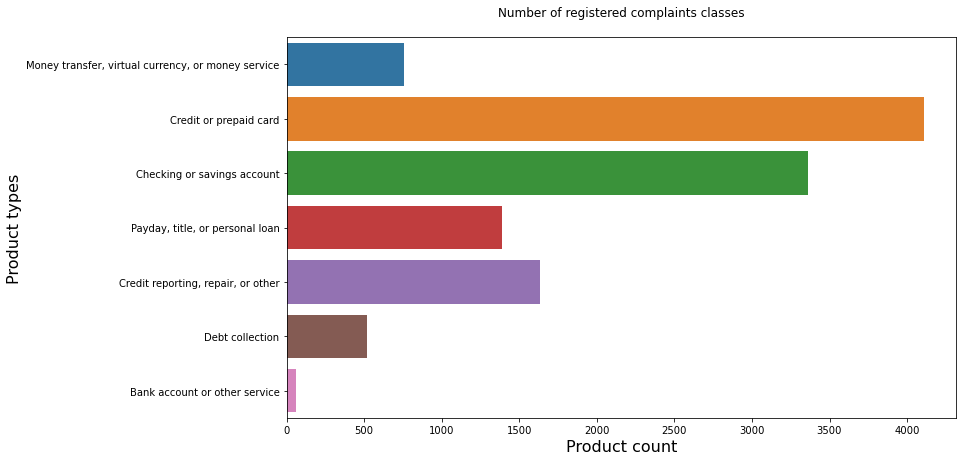

In [70]:
# Number of complaints in each categories
plt.figure(figsize=(12, 7))
ax=sns.countplot(y='product',data=df2,dodge=False)
plt.title('Number of registered complaints classes\n')
plt.ylabel('Product types', fontsize=16)
plt.xlabel('Product count', fontsize=16)
plt.show()

In [50]:
# checking for text length of complaint_narrative
df2['text_length'] =df2['complaint_narrative'].apply(len)

In [51]:
df2.head()

,complaint_date,product,complaint_narrative,product_id,text_length
23,8/9/2019,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",0,1518
47,1/27/2020,Credit or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,1,1467
58,1/14/2019,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,2,1638
64,1/6/2019,Credit or prepaid card,XXXX Chase offered a card with free points of...,1,894
152,1/1/2019,Checking or savings account,"Dear Sir/Madam, On XX/XX/2018, I deposited a c...",2,2405


In [52]:
# checking the largest and smallest 10 texts
df2.nlargest(10, ['text_length'])

,complaint_date,product,complaint_narrative,product_id,text_length
1029972,3/5/2021,Debt collection,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, FL XX...",5,29239
1034579,1/28/2021,Debt collection,"XXXX XXXX XXXX XXXX XXXX XXXX, NY XXXX Social ...",5,25450
116711,3/27/2019,Credit or prepaid card,I opened a credit card with Chase and was appr...,1,23778
1014161,12/23/2020,Debt collection,"XX/XX/XXXX To, Consumer Financial Protection B...",5,21175
113843,6/4/2019,"Money transfer, virtual currency, or money ser...",-- -- -- -- -- Forwarded message -- -- -- -- -...,0,20189
90848,9/9/2019,"Payday, title, or personal loan","RE : Complaint Against JP Morgan Chase, XXXX H...",3,19547
840098,4/3/2019,"Payday, title, or personal loan",Consumer Financial Protection Bureau XXXX XXXX...,3,19161
838767,2/11/2019,"Payday, title, or personal loan","On XX/XX/XXXX, I opened a case against Chase B...",3,17676
864439,6/29/2020,"Payday, title, or personal loan","To whom it may concern, I am writing in regard...",3,17117
18784,6/17/2019,Credit or prepaid card,"Please see below letter, which was signed for ...",1,16755


In [54]:
# checking the largest and smallest 10 texts
df2.nsmallest(10, ['text_length'])

,complaint_date,product,complaint_narrative,product_id,text_length
159307,9/7/2020,Credit or prepaid card,Chase will not help,1,19
242052,6/2/2021,Credit or prepaid card,They closed my Cards,1,20
820532,9/8/2017,"Credit reporting, repair, or other",Unauthorized inquiry.,4,21
409491,9/23/2021,"Credit reporting, repair, or other",I WAS VICTIM OF ID THEFT!!,4,26
255175,9/23/2019,"Payday, title, or personal loan",XXXX never sent statements.,3,27
14893,4/11/2019,"Credit reporting, repair, or other",Can you please remove inquiry,4,29
250397,4/11/2019,"Credit reporting, repair, or other",Can you please remove inquiry,4,29
827252,5/2/2019,Credit or prepaid card,THIS CASE IS NOT RESOLVED XXXX,1,30
812011,3/28/2019,"Credit reporting, repair, or other",Unauthorized inquiry/inquiries.,4,31
989292,4/2/2020,Checking or savings account,I fil a dispute later no respon,2,31


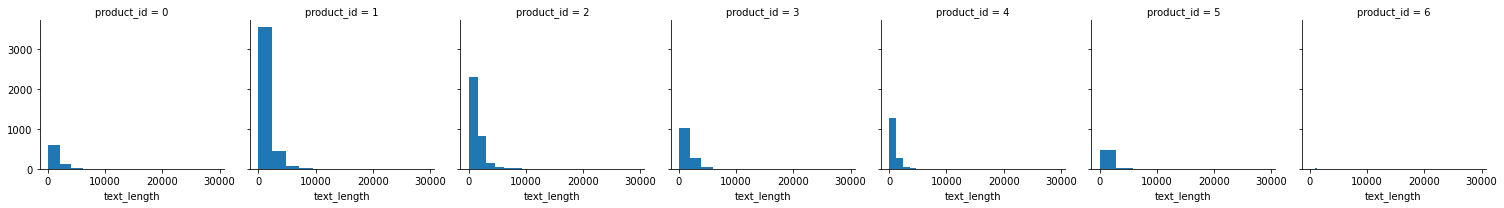

In [55]:
# Checking for text length and the product id
hist = sns.FacetGrid(df2, col = 'product_id')
hist.map(plt.hist, 'text_length')

<AxesSubplot:xlabel='product_id', ylabel='text_length'>

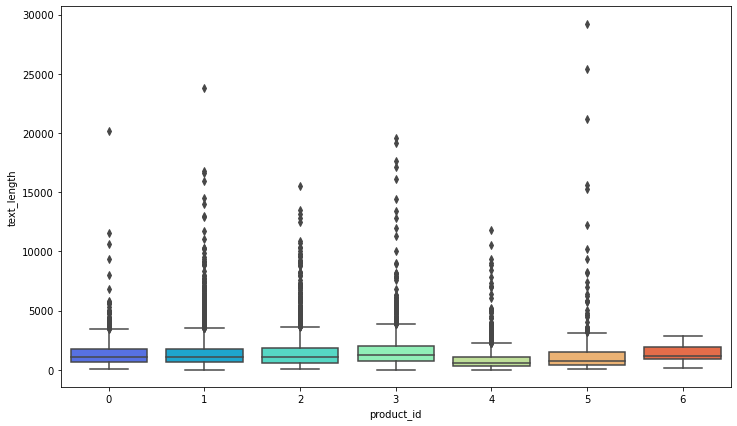

In [56]:
# checking the distribution of text length according to product_id
plt.figure(figsize=(12,7))
sns.boxplot(x = 'product_id', y='text_length', data =df2, palette = 'rainbow')

In [57]:
# Changing the complaint_date column to date time format
df2['complaint_date'] = pd.to_datetime(df2['complaint_date'])

## 3. Text processing (wordcloud)

In [83]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finding patterns that are not relevant
text = re.compile('[^0-9a-z\s #+_]')# other than alpha numeric and some additional characters
xes = re.compile('xxxx')# finding pattern for xxxx
date = re.compile('[XX.XX.\d\d\d\d]') # finding pattern for date as xx\xx\1234
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','thisis','theres','there','dont','really','dear','sir','madam','chase bank','chase','bank','said','told'))

# this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    #x = re.sub('[^a-z\s]', '', x.lower())
    x = text.sub('', x.lower())
    x = xes.sub('',x)
    x = date.sub('',x)
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [84]:
df2['complaint_processed'] = df2['complaint_narrative'].apply(preprocess)

In [75]:
df2.head(10)

,complaint_date,product,complaint_narrative,product_id,text_length,complaint_processed
23,2019-08-09,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",0,1518,attempt purchase concert tickets communicated ...
47,2020-01-27,Credit or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,1,1467,called discuss credit card bill also close acc...
58,2019-01-14,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,2,1638,made purchase bundle spoke agent online verify...
64,2019-01-06,Credit or prepaid card,XXXX Chase offered a card with free points of...,1,894,offered card free points offer representative ...
152,2019-01-01,Checking or savings account,"Dear Sir/Madam, On XX/XX/2018, I deposited a c...",2,2405,sirmadam deposited check number drawn valuing ...
186,2019-07-04,"Payday, title, or personal loan",For the last 16 months I have been receiving u...,3,835,last months receiving unsolicited marketing em...
222,2019-07-26,Credit or prepaid card,I opened a Private Client account at Chase Ban...,1,1029,opened private client account bank weekend app...
237,2018-12-23,Credit or prepaid card,Chase Credit Card XXXX rewards Premier. You ge...,1,1356,credit card rewards premier get elite night cr...
251,2019-07-31,"Credit reporting, repair, or other",When responding to Chase 's letter I call and ...,4,693,responding letter call try discuss bigotry fac...
285,2020-06-16,"Payday, title, or personal loan","JPMorgan Chase Bank , N.A . has continuously a...",3,452,jpmorgan bank na continuously asked informatio...


In [61]:
# save the processed dataframe to csv file
df2.to_csv('complaint_processed_final.csv', index=False)

In [85]:
# lets check how large is our corpus
df2['complaint_processed'].apply(lambda x: len(x.split(' '))).sum()

1238140

### 3.1 Wordcloud

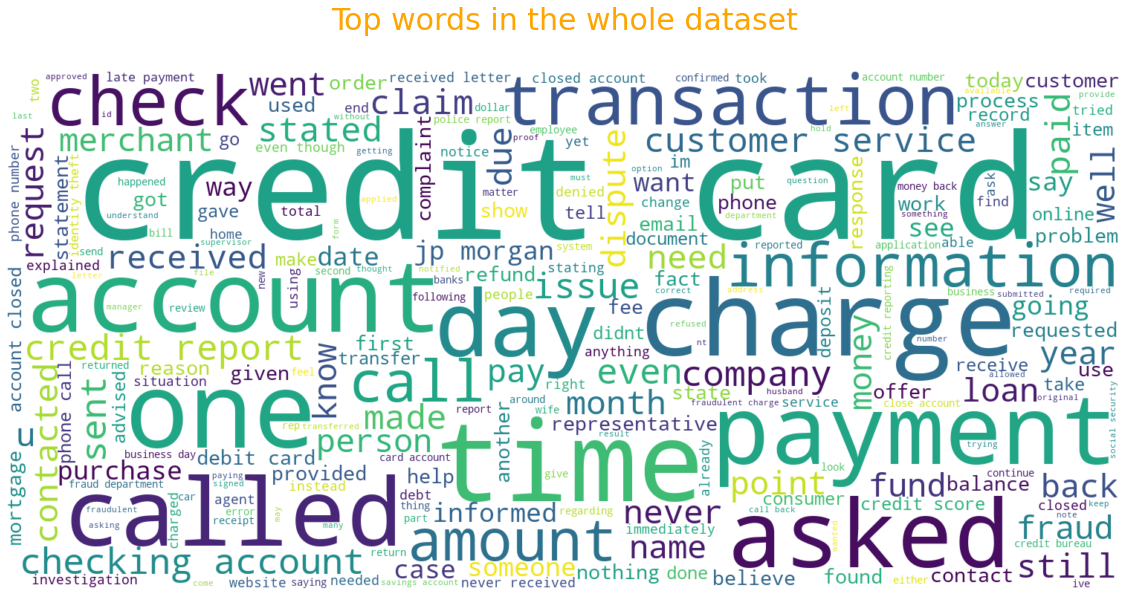

In [98]:
#generating word cloud to have an overview of top used words in the whole complaint dataset.
# viewing the whole corpus
wordcloud = WordCloud(width=1500, height=700, random_state=44, max_words=250, background_color='white')
wordcloud.generate(str(set(df2['complaint_processed'])))

#creating figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.suptitle('Top words in the whole dataset', size = 30, y =.95, color = 'Orange')
plt.show()


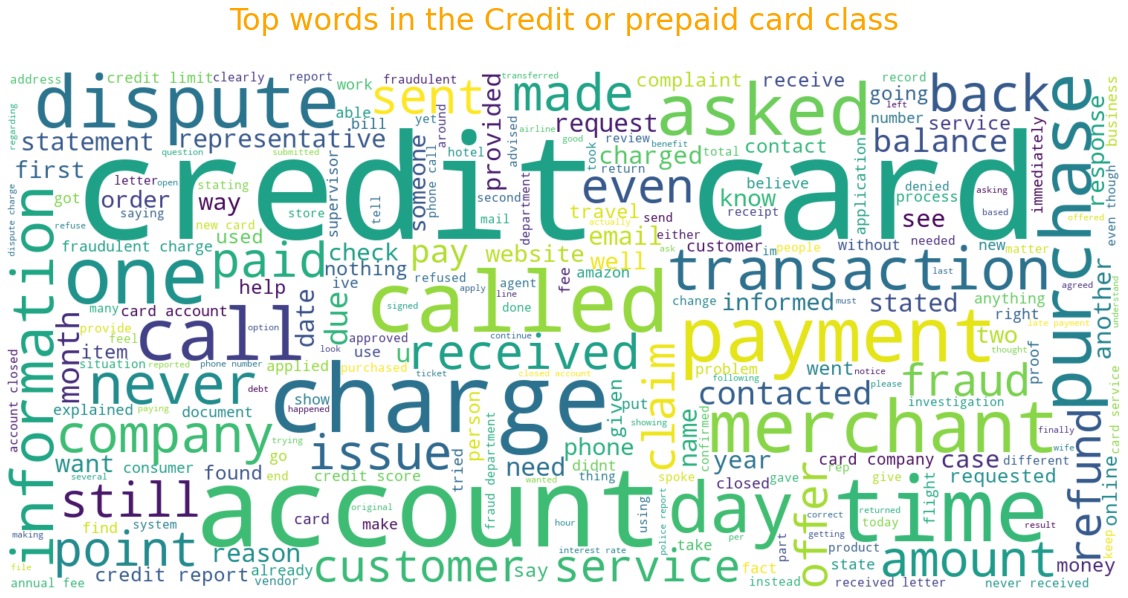

In [97]:
#generating word cloud to have an overview of top used words in prepaid card class
# wordcloud of Credit or prepaid card class
wordcloud = WordCloud(width=1500, height=700, random_state=44, max_words=250, background_color='white')
wordcloud.generate(str(set(df2.query('product_id==1')['complaint_processed'])))

#creating figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.suptitle('Top words in the Credit or prepaid card class', size = 30, y =.95, color = 'Orange')
plt.show()



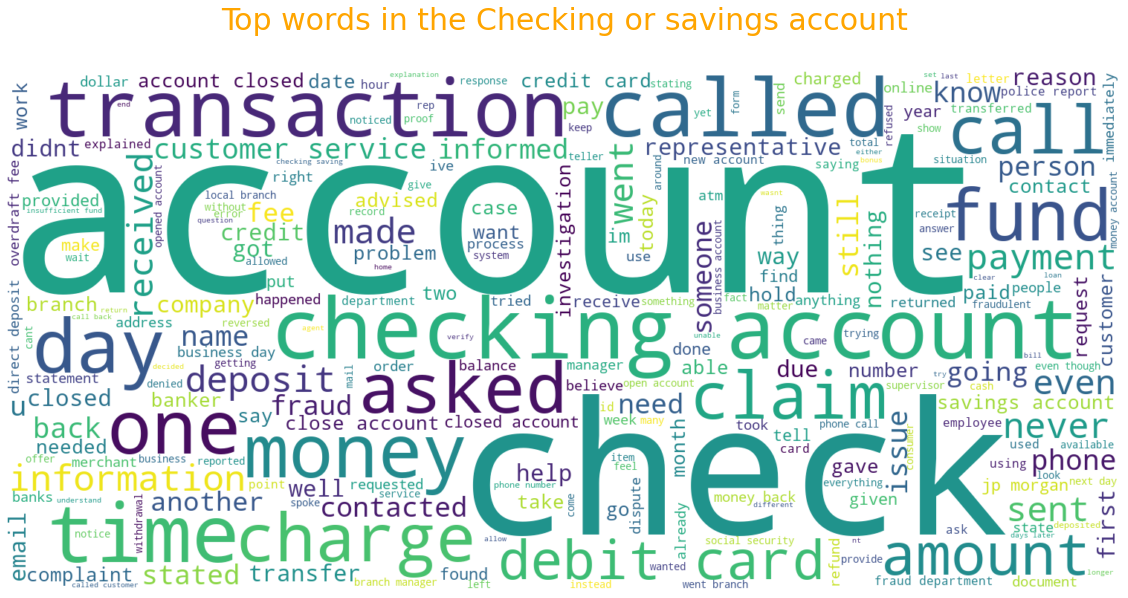

In [99]:
# wordcloud of Checking or savings account
wordcloud = WordCloud(width=1500, height=700, random_state=44, max_words=250, background_color='white')
wordcloud.generate(str(set(df2.query('product_id==2')['complaint_processed'])))

#creating figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.suptitle('Top words in the Checking or savings account', size = 30, y =.95, color = 'Orange')
plt.show()

In [101]:
df2.head()

,complaint_date,product,complaint_narrative,product_id,text_length,complaint_processed
23,2019-08-09,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",0,1518,attempt purchase concert tickets communicated ...
47,2020-01-27,Credit or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,1,1467,called discuss credit card bill also close acc...
58,2019-01-14,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,2,1638,made purchase bundle spoke agent online verify...
64,2019-01-06,Credit or prepaid card,XXXX Chase offered a card with free points of...,1,894,offered card free points offer representative ...
152,2019-01-01,Checking or savings account,"Dear Sir/Madam, On XX/XX/2018, I deposited a c...",2,2405,sirmadam deposited check number drawn valuing ...


## 4. Text processing(model)

In [105]:
## preprocessing for TFIDF I will be removing only XXXX, xx.xx.\d\d\d\d which has been decoded to hide the identity
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finding patterns that are not relevant
text = re.compile('[^0-9a-z\s #+_]')# other than alpha numeric and some additional characters
xes = re.compile('xxxx')# finding pattern for xxxx
date = re.compile('[XX.XX.\d\d\d\d]') # finding pattern for date as xx\xx\1234
# finally let's combine all of these
stopwords = set(i).union(j).union(('xx','xxx','xxxx'))

# this function remove punctuation, stopwords and returns the list of words
def preprocess(x):    
    x = text.sub('', x.lower())
    x = xes.sub('',x)
    x = date.sub('',x)
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)
df2['clean_text'] = df2['complaint_narrative'].apply(preprocess)

In [106]:
df2.head()

,complaint_date,product,complaint_narrative,product_id,text_length,complaint_processed,clean_text
23,2019-08-09,"Money transfer, virtual currency, or money ser...","In an attempt to purchase concert tickets, I c...",0,1518,attempt purchase concert tickets communicated ...,attempt purchase concert tickets communicated ...
47,2020-01-27,Credit or prepaid card,In XX/XX/2019 I called Chase to discuss my cre...,1,1467,called discuss credit card bill also close acc...,called chase discuss credit card bill also clo...
58,2019-01-14,Checking or savings account,I made a purchase from XXXX XXXX for a XXXX XX...,2,1638,made purchase bundle spoke agent online verify...,made purchase bundle spoke agent online verify...
64,2019-01-06,Credit or prepaid card,XXXX Chase offered a card with free points of...,1,894,offered card free points offer representative ...,chase offered card free points offer represent...
152,2019-01-01,Checking or savings account,"Dear Sir/Madam, On XX/XX/2018, I deposited a c...",2,2405,sirmadam deposited check number drawn valuing ...,dear sirmadam deposited check number drawn val...


In [113]:
#df2.to_csv('df_clean_text.csv')

In [7]:
df2 = pd.read_csv('df_clean_text.csv')

In [14]:
# creating product_id dataframe for future use 
product_id_df = df2[['product', 'product_id']].drop_duplicates()

### 4.1 TF-IDF transformation

Vector transformation with TF-IDF
* `max_df=0.5`: This drops words that occur in more than half of the documents.
* `min_df=3`: This makes the vectorizer only use words that appear at least thrice.
* `use_idf=True`: This makes the vectorizer use inverse document frequencies in weighting.
* `norm=u'l2'`: This applies a correction factor so that longer and shorter documents are treated equally.
* `smooth_idf=True`: This adds `1` to all document frequencies, as if an extra document existed that used every word once. This prevents divide-by-zero errors.

In [9]:
tfidf = TfidfVectorizer(sublinear_tf =True, 
                        min_df=3,
                        use_idf = True,
                        norm = u'l2', 
                        ngram_range = (1,2),
                        smooth_idf = True, 
                        stop_words = 'english')

# Applying the vectorizer
X = tfidf.fit_transform(df2.clean_text)

In [10]:
#checking the transformed data
tfidf_df = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names_out())
df3 = pd.concat([tfidf_df, df2[['clean_text','product_id']]], axis=1)

In [11]:
df3.head()

,_______,aa,aarp,aarp chase,abandon,abandoned,abetting,abhorrent,abide,abide laws,...,zero record,zero responsibility,zero sense,zeroed,zeros,zip,zip code,zone,clean_text,product_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,attempt purchase concert tickets communicated ...,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,called chase discuss credit card bill also clo...,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,made purchase bundle spoke agent online verify...,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chase offered card free points offer represent...,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dear sirmadam deposited check number drawn val...,2


In [12]:
# creating X and y features
y = df3['product_id']
X = np.array(df3.drop(['clean_text','product_id'], 1))

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 44)


C:\Users\sunil\AppData\Local\Temp/ipykernel_11508/2118631163.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df3.drop(['clean_text','product_id'], 1))


In [13]:
print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 8873
The number of observations in test set is 2958
